In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
# Define the file path
first = r'1.csv'

# Attempt to read the CSV file, allowing for irregular rows
df1 = pd.read_csv(first, on_bad_lines='skip', delimiter=';')
df1.fillna('', inplace=True)

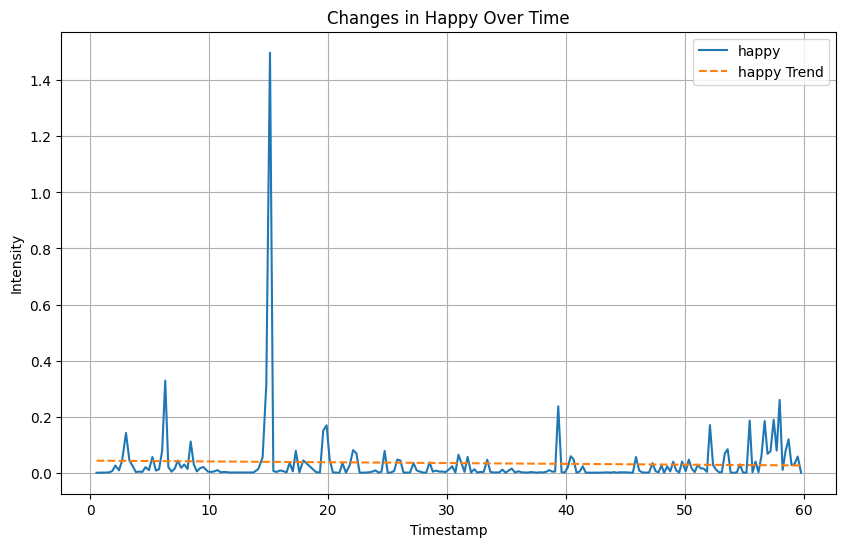

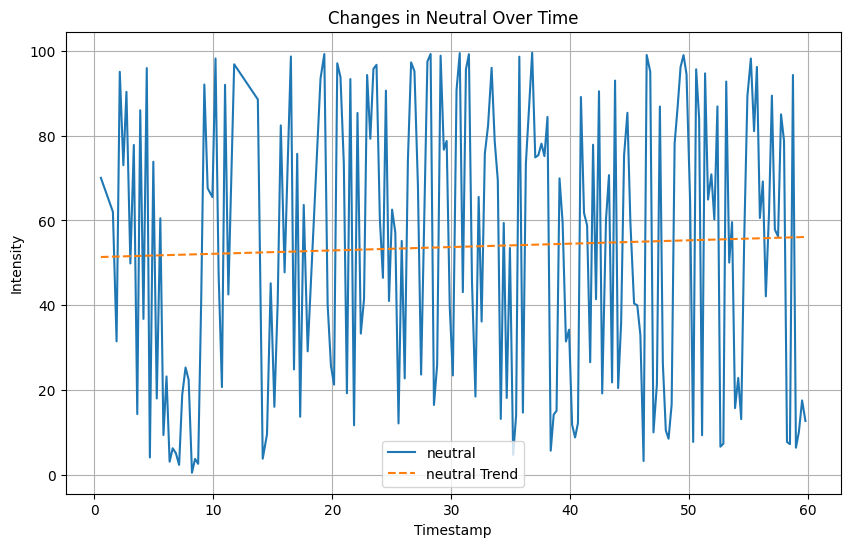

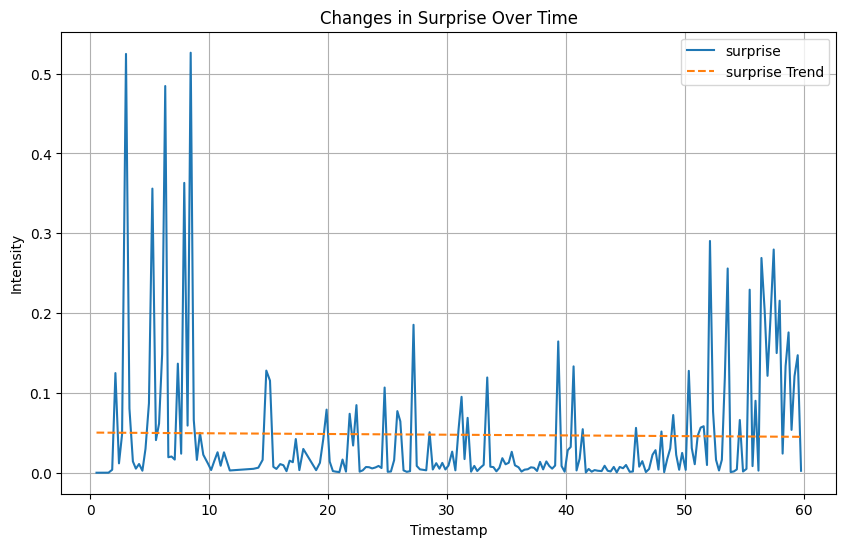

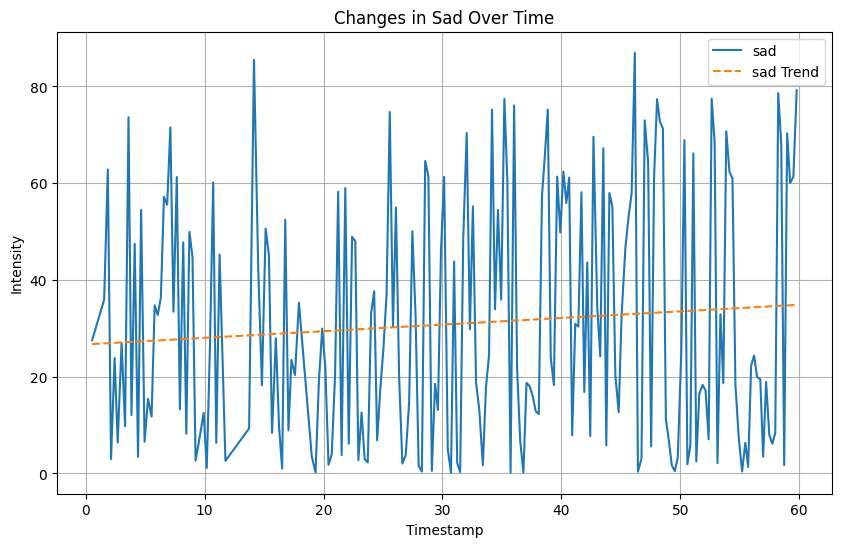

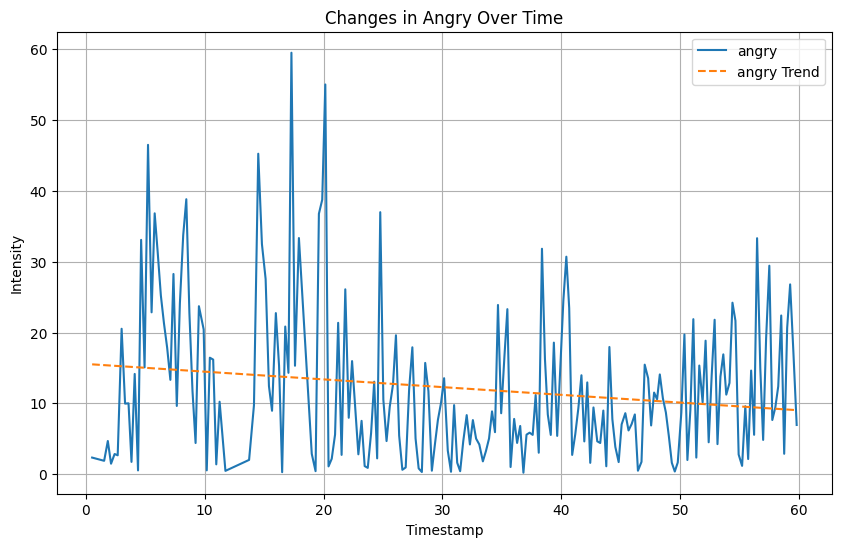

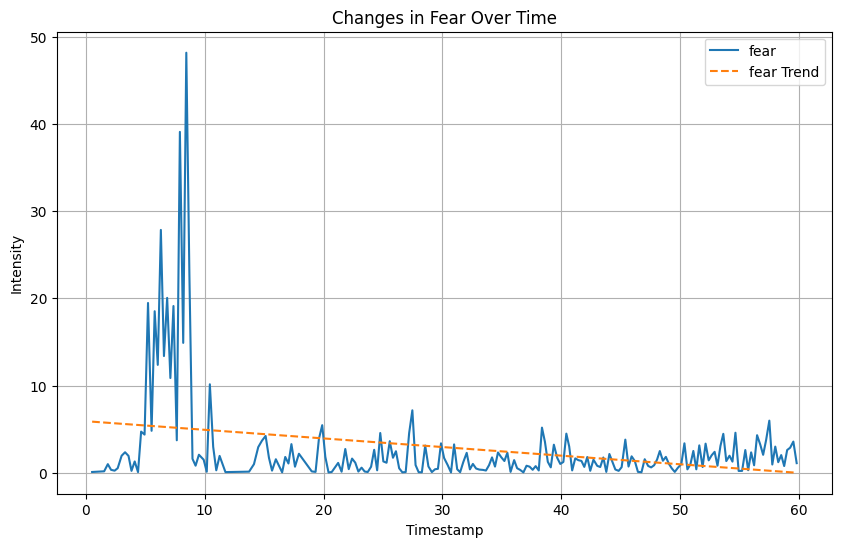

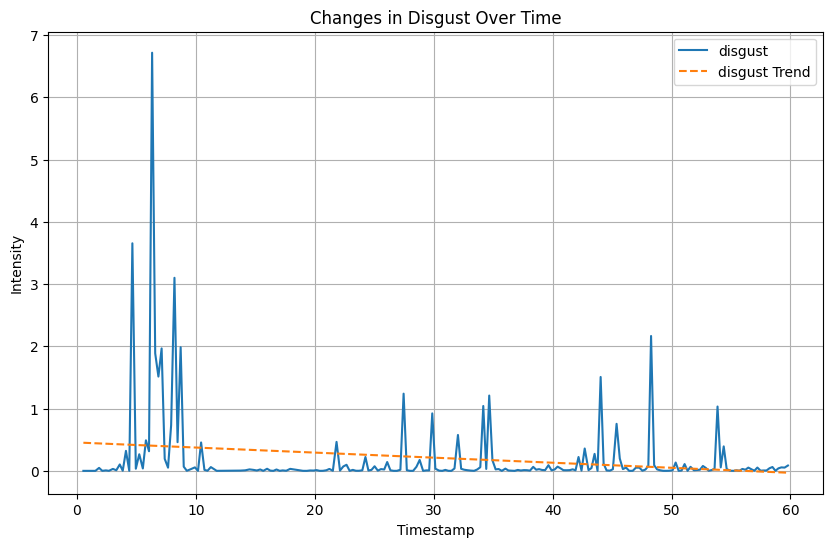

In [70]:
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean1 = df1.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean1[numeric_columns] = df_clean1[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean1[numeric_columns] = df_clean1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean1[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [71]:
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean1 = df_clean1.drop('timestamp', axis=1)
stats = df_clean1.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Podstawowe wartości statystyczne dla każdej emocji:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nStosunek każdej emocji do siebie (średnia wartość):")
print(ratios)

Podstawowe wartości statystyczne dla każdej emocji:
               mean        std       min        25%        50%        75%  \
happy      0.034031   0.114041  0.000095   0.001134   0.004901   0.030659   
neutral   53.864263  32.679138  0.442783  21.236288  59.543818  85.365576   
surprise   0.047462   0.086231  0.000004   0.004038   0.011753   0.053198   
sad       31.021701  25.225432  0.140089   7.684481  23.887043  55.161619   
angry     12.084506  10.906404  0.209569   4.202222   9.319843  16.916732   
fear       2.751755   5.658975  0.029001   0.406023   1.264559   2.599394   
disgust    0.196283   0.658003  0.000004   0.003794   0.017717   0.060475   

                max  
happy      1.498230  
neutral   99.584526  
surprise   0.526150  
sad       86.960940  
angry     59.498215  
fear      48.171329  
disgust    6.715327  

Stosunek każdej emocji do siebie (średnia wartość):
happy       0.000340
neutral     0.538643
surprise    0.000475
sad         0.310217
angry       0.1208

In [72]:
# Define the file path
second = r'2.csv'

# Attempt to read the CSV file, allowing for irregular rows
df2 = pd.read_csv(second, on_bad_lines='skip', delimiter=';')
df2.fillna('', inplace=True)

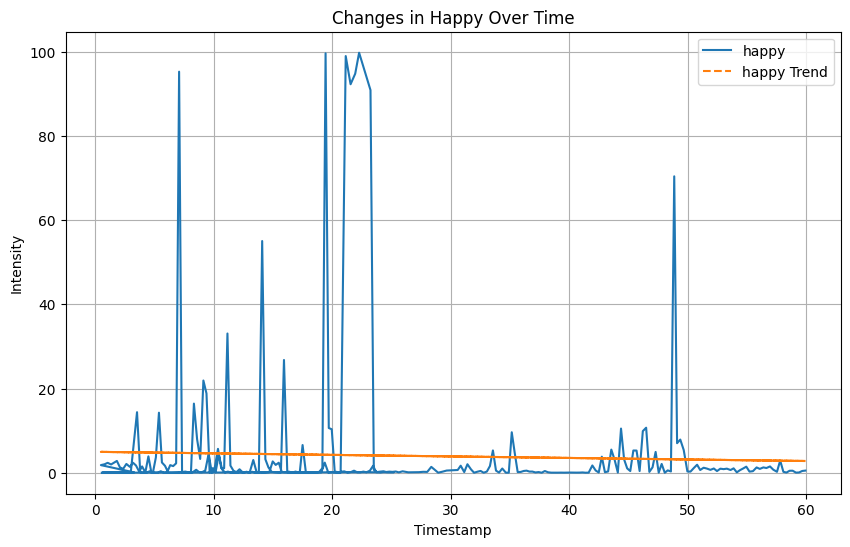

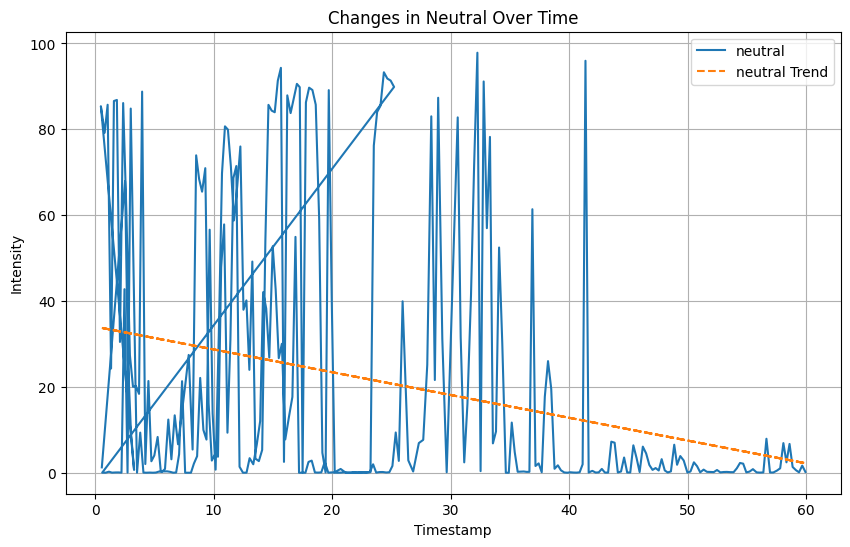

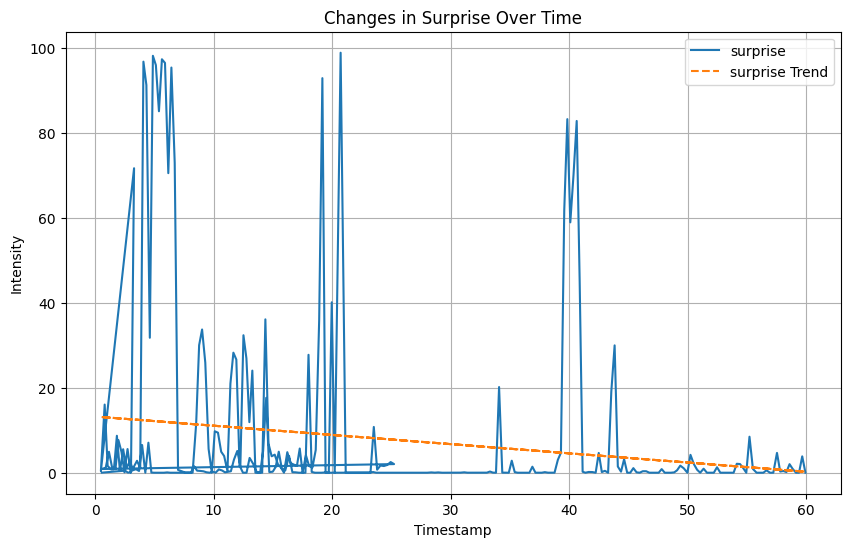

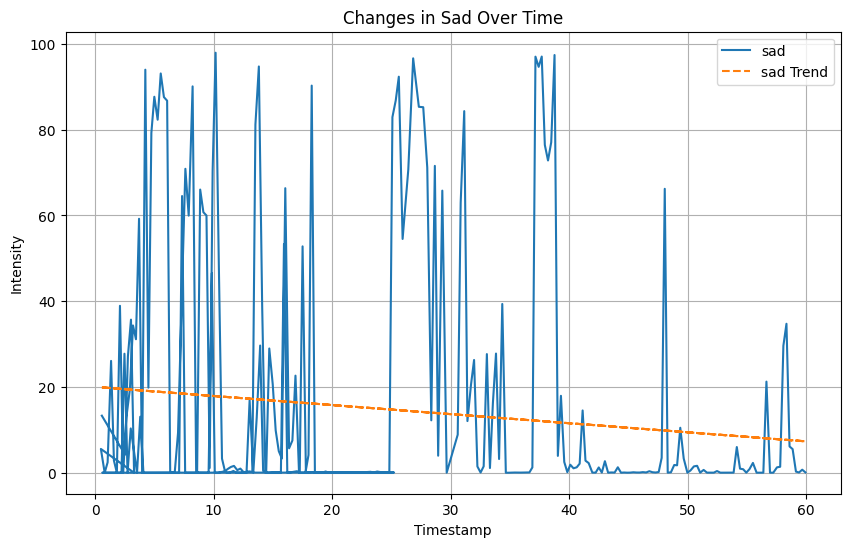

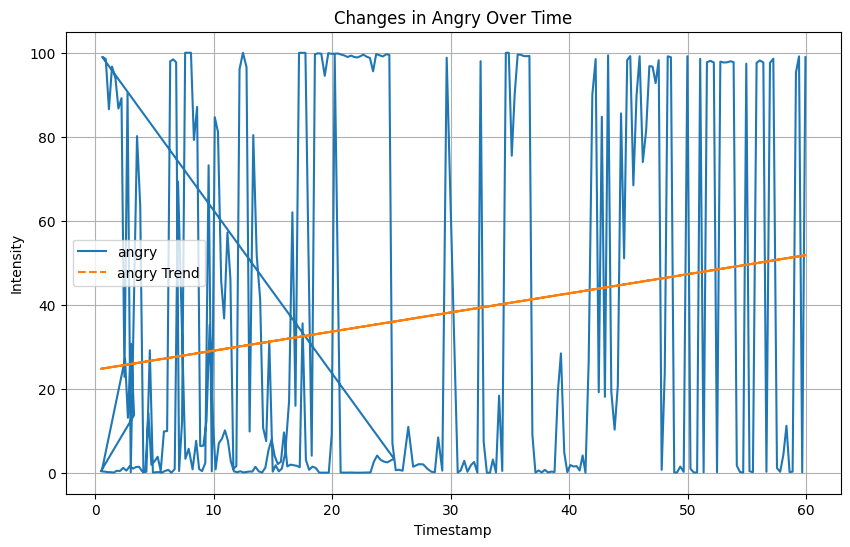

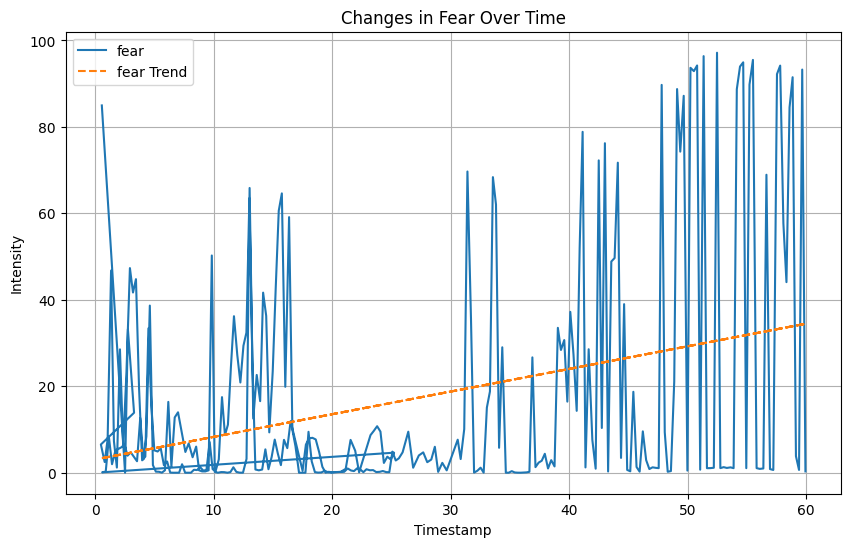

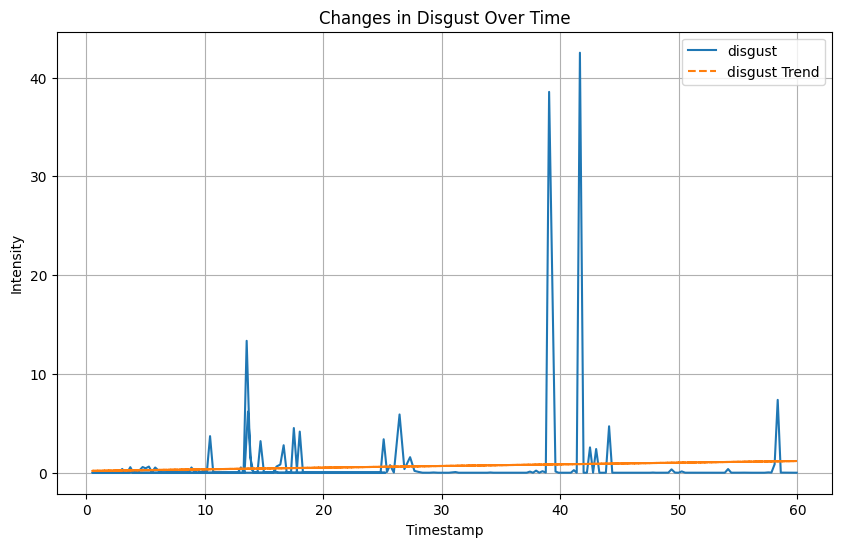

In [73]:
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean2 = df2.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean2[numeric_columns] = df_clean2[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean2[numeric_columns] = df_clean2[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean2[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [74]:
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean2 = df_clean2.drop('timestamp', axis=1)
stats = df_clean2.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Podstawowe wartości statystyczne dla każdej emocji:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nStosunek każdej emocji do siebie (średnia wartość):")
print(ratios)

Podstawowe wartości statystyczne dla każdej emocji:
               mean        std           min           25%           50%  \
happy      4.064534  15.436986  7.618140e-07  4.137770e-02  2.604372e-01   
neutral   20.864855  30.972956  3.305800e-07  1.215102e-01  2.688086e+00   
surprise   7.860750  20.838627  3.324600e-10  1.917762e-03  1.595200e-01   
sad       14.765836  27.973723  4.275460e-07  1.157747e-02  1.548593e-01   
angry     35.798721  43.042637  4.352910e-04  4.776619e-01  7.191442e+00   
fear      16.050459  26.112912  6.223590e-05  5.522307e-01  3.371793e+00   
disgust    0.594845   3.641122  6.822590e-21  1.123593e-12  1.192600e-09   

                75%        max  
happy      1.310855  99.788851  
neutral   30.594102  97.831821  
surprise   2.816125  98.880822  
sad       12.373043  97.960770  
angry     94.693417  99.999911  
fear      17.795153  97.159487  
disgust    0.006903  42.518857  

Stosunek każdej emocji do siebie (średnia wartość):
happy       0.040645
n

In [75]:
# Define the file path
third = r'1.csv'

# Attempt to read the CSV file, allowing for irregular rows
df3 = pd.read_csv(third, on_bad_lines='skip', delimiter=';')
df3.fillna('', inplace=True)

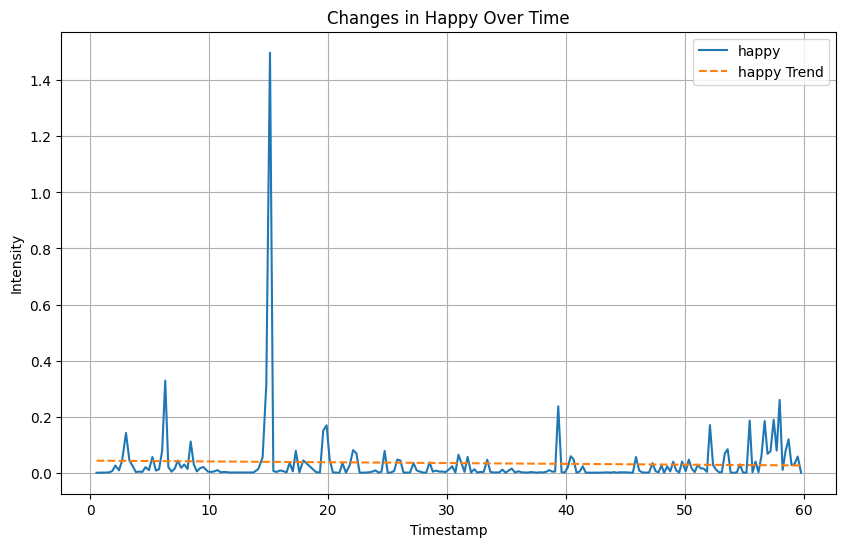

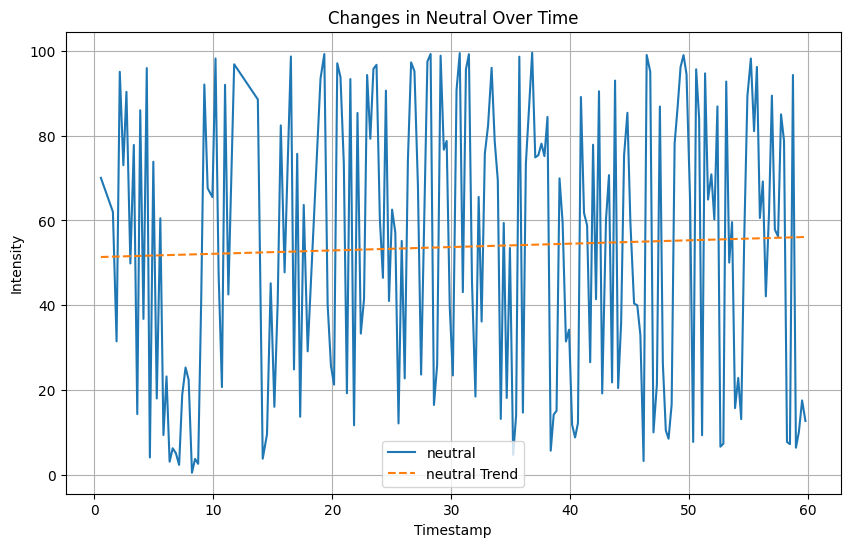

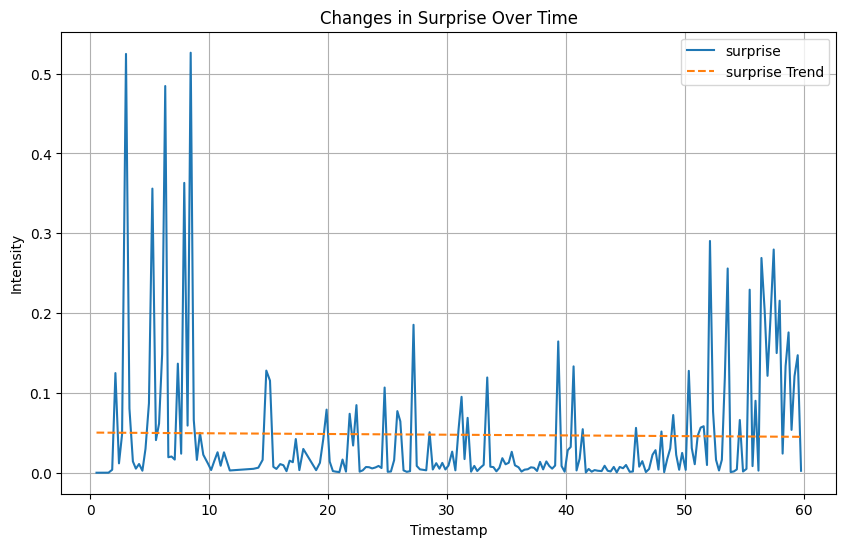

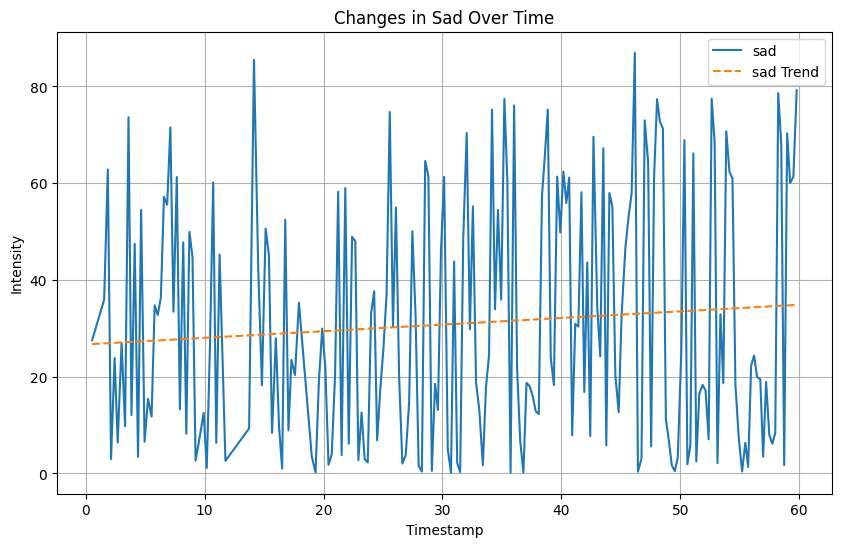

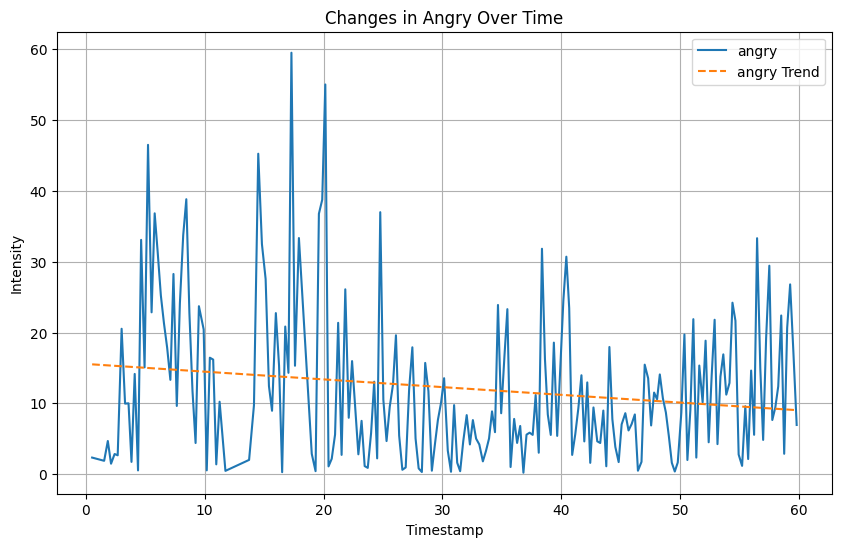

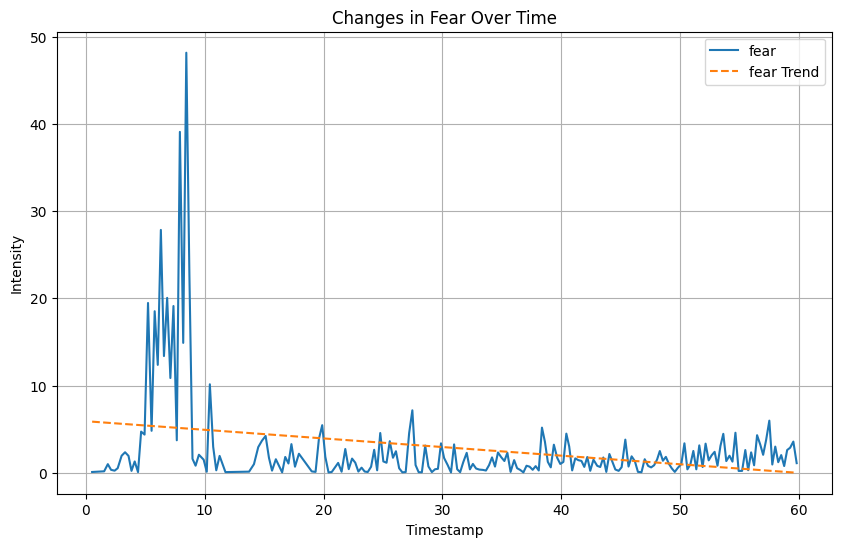

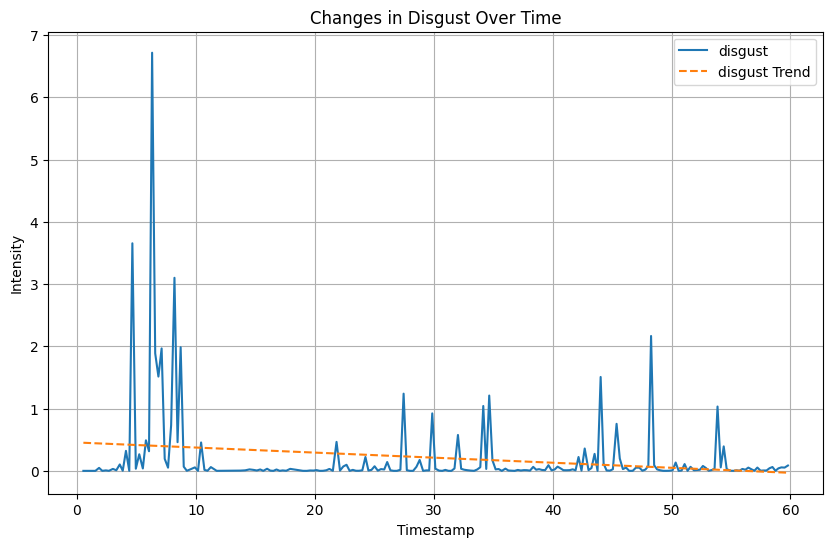

In [76]:
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean3 = df3.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean3[numeric_columns] = df_clean3[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean3[numeric_columns] = df_clean3[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean3[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [77]:
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean3 = df_clean3.drop('timestamp', axis=1)
stats = df_clean3.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Podstawowe wartości statystyczne dla każdej emocji:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nStosunek każdej emocji do siebie (średnia wartość):")
print(ratios)

Podstawowe wartości statystyczne dla każdej emocji:
               mean        std       min        25%        50%        75%  \
happy      0.034031   0.114041  0.000095   0.001134   0.004901   0.030659   
neutral   53.864263  32.679138  0.442783  21.236288  59.543818  85.365576   
surprise   0.047462   0.086231  0.000004   0.004038   0.011753   0.053198   
sad       31.021701  25.225432  0.140089   7.684481  23.887043  55.161619   
angry     12.084506  10.906404  0.209569   4.202222   9.319843  16.916732   
fear       2.751755   5.658975  0.029001   0.406023   1.264559   2.599394   
disgust    0.196283   0.658003  0.000004   0.003794   0.017717   0.060475   

                max  
happy      1.498230  
neutral   99.584526  
surprise   0.526150  
sad       86.960940  
angry     59.498215  
fear      48.171329  
disgust    6.715327  

Stosunek każdej emocji do siebie (średnia wartość):
happy       0.000340
neutral     0.538643
surprise    0.000475
sad         0.310217
angry       0.1208

In [78]:
df_combined = pd.concat([df_clean1, df_clean2, df_clean3])

# Oblicz podstawowe wartości statystyczne dla połączonego DataFrame
stats_combined = df_combined.describe().transpose()

# Wyświetl podstawowe wartości statystyczne
print("Podstawowe wartości statystyczne dla połączonych danych:")
print(stats_combined[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

Podstawowe wartości statystyczne dla połączonych danych:
               mean        std           min       25%        50%        75%  \
happy      1.731085  10.203857  7.618140e-07  0.003137   0.027308   0.189179   
neutral   39.969775  35.848919  3.305800e-07  3.916489  29.564987  75.401364   
surprise   3.337268  14.049877  3.324600e-10  0.003311   0.016116   0.172948   
sad       24.177126  27.577278  4.275460e-07  0.374491  12.275758  46.455934   
angry     22.069439  31.376593  4.352910e-04  1.892530   8.910990  22.847011   
fear       8.351209  18.660388  6.223590e-05  0.482475   1.491042   4.581954   
disgust    0.364098   2.420777  6.822590e-21  0.000006   0.006173   0.049687   

                max  
happy     99.788851  
neutral   99.584526  
surprise  98.880822  
sad       97.960770  
angry     99.999911  
fear      97.159487  
disgust   42.518857  
